### 5.1 Show that you understand the BLAST+ package (2 points)
The BLAST+ package contains five core blast search programs.
1. List all five core blast search programs.



2. Explain the difference between blastn and blastp

blastn is for using blast within nucleotide sequences

blastp is for searching within protein sequences



### 5.2 Show that you understand the biological experiment and data (2 points)
Write a short paragraph in your own words to explain the biological experiment that was
done to generate the sequence data (see the publication), what sequences are contained in
the PacBio_VSG_filtered_reads_sample_name.fasta files, and what sequences are
contained in the TREU927-v26_VSGTranscripts database.

Answer the following question: What is the number of sequences in your input file? Hint:
Most popular programming languages have packages that can parse FASTA files automatically

**5.2 Paragraph answer:**



**5.2 seq num answer** number of sequences in file = 19240
See code below for parsing



In [1]:
import pyfastx
from pathlib import Path
pwd = Path().absolute()

In [2]:
directory = f"{str(pwd)}/data/PacBio_VSG_filtered_reads_balbc_10_5.fasta"
fa = pyfastx.Fasta(directory)
print(fa)

<Fasta> /home/henrik/BINF200_H23/assignments/data/PacBio_VSG_filtered_reads_balbc_10_5.fasta contains 19240 sequences


### 5.3 BLAST the sample sequences against the reference VSG database (4
points)

Blast sample sequences against reference vsg database
PacBio_VSG_filtered_reads_balbc_10_5

1. Change the input file name to your assigned sample file (see Table 1).
2. Change the output file name to something containing your sample label (see Table 1).
3. What does the paramater -max_target_seq do and why was it set to 1?

Blast command used to do the general file


*Command from repo*
```
blastn -query data/PacBio_VSG_filtered_reads_balbc_10_5.fasta -db data/TREU927-v26_VSGTranscripts/TREU927-v26_VSGTranscripts.fasta -out outdata/PacBio_VSG_filtered_reads_balbc_10_5_outfmt6.txt -max_target_seqs 1 -outfmt '6 qseqid sseqid qseq sseq qlen slen qstart qend sstart send evalue bitscore score length nident mismatch positive gapopen gaps ppos'
```

4.

*Command with updated flags to match question 4*

```
blastn -query data/PacBio_VSG_filtered_reads_balbc_10_5.fasta -db data/TREU927-v26_VSGTranscripts/TREU927-v26_VSGTranscripts.fasta -out outdata/PacBio_VSG_filtered_reads_balbc_10_5_outfmt6.txt -max_target_seqs 1 -outfmt '6 qseqid sseqid score bitscore evalue qlen slen length sstart send nident mismatch gaps positive'
```

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(f"{str(pwd)}/outdata/PacBio_VSG_filtered_reads_balbc_10_5_outfmt6.txt", sep="	", header=None)
print(df)

                            0              1     2       3    4     5     6   \
0           balbc_10_5/52/ccs6  Tb08.27P2.380   766  1415.0  0.0  1724  1551   
1           balbc_10_5/67/ccs2  Tb08.27P2.380   783  1447.0  0.0  1787  1551   
2           balbc_10_5/85/ccs8  Tb08.27P2.380   819  1513.0  0.0  1759  1551   
3           balbc_10_5/92/ccs5  Tb08.27P2.380   766  1415.0  0.0  1794  1551   
4           balbc_10_5/99/ccs3   Tb09.v4.0077  1301  2403.0  0.0  1618  1470   
...                        ...            ...   ...     ...  ...   ...   ...   
19285  balbc_10_5/163001/ccs16   Tb09.v4.0088  1314  2427.0  0.0  1469  1317   
19286   balbc_10_5/163150/ccs5    Tb927.10.10  1345  2484.0  0.0  1475  1377   
19287   balbc_10_5/163290/ccs7  Tb08.27P2.380   798  1474.0  0.0  1745  1551   
19288   balbc_10_5/163466/ccs5   Tb09.v4.0088  1284  2372.0  0.0  1447  1317   
19289   balbc_10_5/163473/ccs2   Tb10.v4.0065  1295  2392.0  0.0  1731  1500   

         7   8     9     10   11  12   

### 5.4 1. What is the number of sequences in your blast output file? Is it the same as in the
input file? Hint: Import the BLAST output file into a DataFrame.

One can see from the `print(df)` that there are 19290 rows,
the input file has 19240 sequences, while the output file has 19290 sequences, so a an increase in 50 lines. 

In [4]:
###5.4 2. We define the alignment coverage as the percentage of the subject sequence covered
# by the alignment. Compute the alignment coverage for all sequences from the BLAST
# output.


df['coverage'] = np.divide(df[7],df[6])*100

print(df)

                             0              1     2       3    4     5     6  \
0           balbc_10_5/52/ccs6  Tb08.27P2.380   766  1415.0  0.0  1724  1551   
1           balbc_10_5/67/ccs2  Tb08.27P2.380   783  1447.0  0.0  1787  1551   
2           balbc_10_5/85/ccs8  Tb08.27P2.380   819  1513.0  0.0  1759  1551   
3           balbc_10_5/92/ccs5  Tb08.27P2.380   766  1415.0  0.0  1794  1551   
4           balbc_10_5/99/ccs3   Tb09.v4.0077  1301  2403.0  0.0  1618  1470   
...                        ...            ...   ...     ...  ...   ...   ...   
19285  balbc_10_5/163001/ccs16   Tb09.v4.0088  1314  2427.0  0.0  1469  1317   
19286   balbc_10_5/163150/ccs5    Tb927.10.10  1345  2484.0  0.0  1475  1377   
19287   balbc_10_5/163290/ccs7  Tb08.27P2.380   798  1474.0  0.0  1745  1551   
19288   balbc_10_5/163466/ccs5   Tb09.v4.0088  1284  2372.0  0.0  1447  1317   
19289   balbc_10_5/163473/ccs2   Tb10.v4.0065  1295  2392.0  0.0  1731  1500   

          7  8     9    10   11  12    

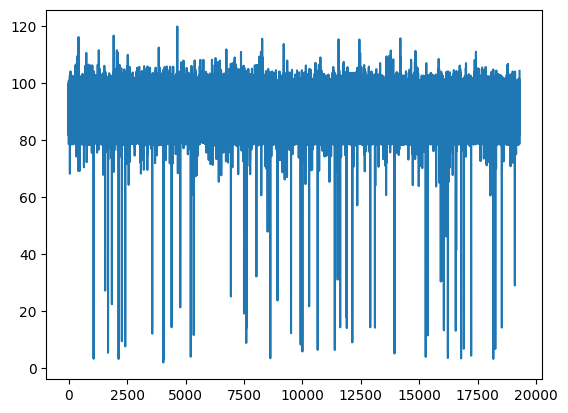

In [5]:
### 5.4 3. Visualize the distribution of alignment coverages as a histogram
import matplotlib.pyplot as plt

plt.plot(df.index,df["coverage"])
plt.show()  


       index                        0              1     2       3    4     5  \
0          0       balbc_10_5/52/ccs6  Tb08.27P2.380   766  1415.0  0.0  1724   
1          1       balbc_10_5/67/ccs2  Tb08.27P2.380   783  1447.0  0.0  1787   
2          2       balbc_10_5/85/ccs8  Tb08.27P2.380   819  1513.0  0.0  1759   
3          3       balbc_10_5/92/ccs5  Tb08.27P2.380   766  1415.0  0.0  1794   
4          4       balbc_10_5/99/ccs3   Tb09.v4.0077  1301  2403.0  0.0  1618   
...      ...                      ...            ...   ...     ...  ...   ...   
19226  19285  balbc_10_5/163001/ccs16   Tb09.v4.0088  1314  2427.0  0.0  1469   
19227  19286   balbc_10_5/163150/ccs5    Tb927.10.10  1345  2484.0  0.0  1475   
19228  19287   balbc_10_5/163290/ccs7  Tb08.27P2.380   798  1474.0  0.0  1745   
19229  19288   balbc_10_5/163466/ccs5   Tb09.v4.0088  1284  2372.0  0.0  1447   
19230  19289   balbc_10_5/163473/ccs2   Tb10.v4.0065  1295  2392.0  0.0  1731   

          6     7  8     9 

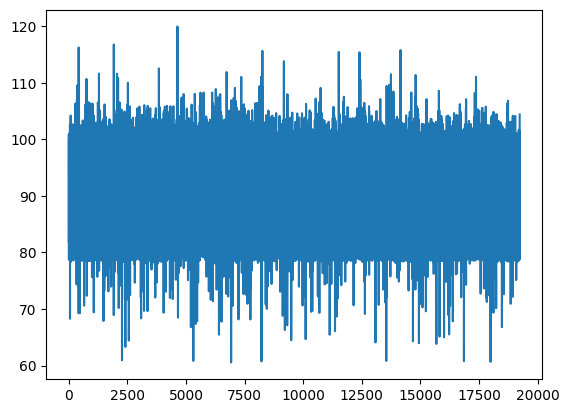

In [6]:
# 4. Remove alignments with coverage less than 60% 


df_60 = df[df["coverage"] >= 60] 
df_60 = df_60.reset_index()
print(df_60)

plt.plot(df_60.index,df_60["coverage"])
plt.show()  

In [7]:
#verify that each query sequence is now aligned to at most one subject sequence.
i = 0
unique_list = []
for seq in df_60[0]:
    if seq in unique_list:
        print(str(seq))
        i+=1
        
    else:
        unique_list.append(seq)

print(f"duplicate amounts = {i}")

duplicate amounts = 0
